In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fisher linear classification
## We assume the same covariance matrix for both classes (we assume there exist two classes m = {-1, 1})

# First we generate two groups of points in 2D space, with the same covariance matricies (one group is translated by an arbitrary vector)

In [2]:
number_of_points = 64
covariance = np.array([[-1.55, 4], [4, -1.55]])
mean = np.array([1, 1])
translation = np.array([3, 3])

group_adam = np.random.multivariate_normal(mean, covariance, number_of_points)
eve_shift = number_of_points - 0
group_eve = np.random.multivariate_normal(mean + translation, covariance, eve_shift)
adam_group_class = np.array(number_of_points * [1])
eve_group_class = np.array(eve_shift * [-1])

C:\Users\matip\AppData\Local\Temp\ipykernel_4904\1961991384.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  group_adam = np.random.multivariate_normal(mean, covariance, number_of_points)
C:\Users\matip\AppData\Local\Temp\ipykernel_4904\1961991384.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  group_eve = np.random.multivariate_normal(mean + translation, covariance, eve_shift)


# Plot Adam and Eve group

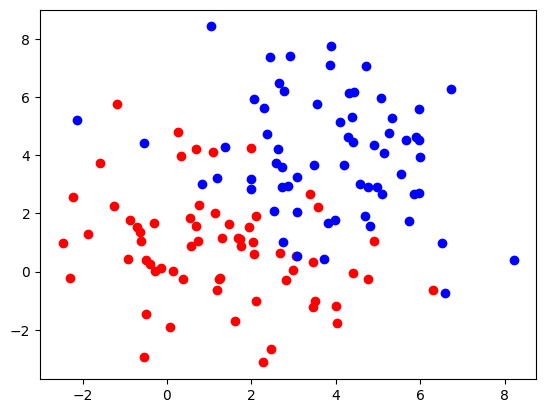

In [3]:
plt.scatter(group_adam[:, 0], group_adam[:, 1], c='r', label='Adam')
plt.scatter(group_eve[:, 0], group_eve[:, 1], c='b', label='Eve')
plt.show()

In [4]:
print('covariance of Adam group')
print(np.cov(group_adam.T))
print('covariance of Eve group')
print(np.cov(group_eve.T))

covariance of Adam group
[[ 3.70993755 -1.01586674]
 [-1.01586674  3.35083396]]
covariance of Eve group
[[ 3.36351324 -0.81465239]
 [-0.81465239  4.01813076]]


# Matrix W

In [5]:
def w_matrix(points1, points2):
    len_points1 = len(points1)
    len_points2 = len(points2)
    factor = 1/(len_points1 + len_points2 - 2)
    covariance1 = np.cov(points1.T)
    covariance2 = np.cov(points2.T)
    w_matrix = factor * (covariance1 + covariance2)
    return w_matrix


In [6]:
# adam and eve w matrix
w_matrix_adam_eve = w_matrix(group_adam, group_eve)
print(w_matrix_adam_eve)

[[ 0.0561385  -0.01452793]
 [-0.01452793  0.05848385]]


In [7]:
adam_centroid = np.mean(group_adam, axis=0)
eve_centroid = np.mean(group_eve, axis=0)

In [8]:
print(adam_centroid)
print(eve_centroid)

[1.18289094 0.80880901]
[3.87133994 3.98718159]


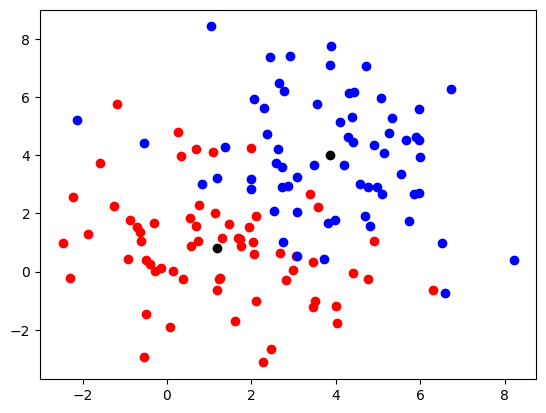

In [9]:
plt.scatter(group_adam[:, 0], group_adam[:, 1], c='r', label='Adam')
plt.scatter(group_eve[:, 0], group_eve[:, 1], c='b', label='Eve')
# centroids
plt.scatter(adam_centroid[0], adam_centroid[1], c='black', label='Adam centroid')
plt.scatter(eve_centroid[0], eve_centroid[1], c='black', label='Eve centroid')
plt.show()

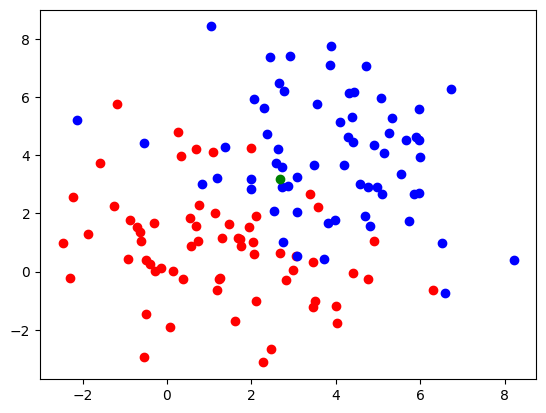

In [10]:
# centroids difference
centroids_difference = eve_centroid - adam_centroid
plt.plot(group_adam[:, 0], group_adam[:, 1], 'ro')
plt.plot(group_eve[:, 0], group_eve[:, 1], 'bo')
plt.plot(centroids_difference[0], centroids_difference[1], 'go')
plt.show()

In [11]:
w_matrix_adam_eve

array([[ 0.0561385 , -0.01452793],
       [-0.01452793,  0.05848385]])

In [12]:
inverted_w_matrix = np.linalg.inv(w_matrix_adam_eve)

In [13]:
inverted_w_matrix

array([[19.03687647,  4.72893655],
       [ 4.72893655, 18.27345007]])

In [14]:
canonical_vector = inverted_w_matrix @ centroids_difference

In [15]:
canonical_vector

array([66.20999373, 70.79333736])

In [16]:
def find_middle_point(point1, point2):
    '''find the point that lies in the middle of two vectors'''
    midpoint = (point1 + point2) / 2
    return midpoint

In [17]:
def linear_function_from_vector(vector, midpoint):
    '''find y = ax + b from vector'''
    a = -vector[0] / vector[1]
    b = -a * midpoint[0] + midpoint[1]
    return a, b

In [18]:
midpoint = find_middle_point(adam_centroid, eve_centroid)
a, b = linear_function_from_vector(canonical_vector, midpoint)

In [19]:
linear_function = lambda x: a * x + b

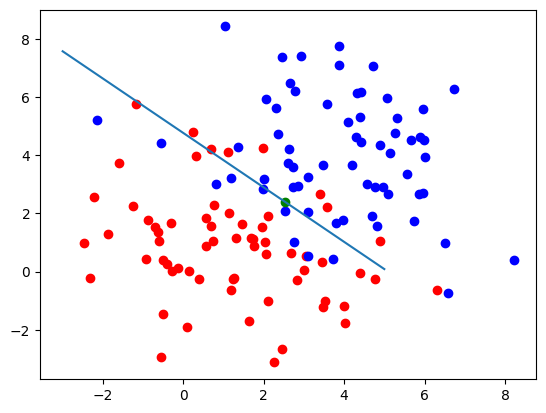

In [20]:
# arguments to plot
x = np.linspace(-3, 5, 100)
y = linear_function(x)
plt.plot(group_adam[:, 0], group_adam[:, 1], 'ro')
plt.plot(group_eve[:, 0], group_eve[:, 1], 'bo')
plt.plot(midpoint[0], midpoint[1], 'go')
plt.plot(x, y)
plt.show()

In [21]:
# use linear regression classifier to find the decision boundary between adam and eve groups
from sklearn.linear_model import LinearRegression
linear_classifier = LinearRegression()
linear_classifier.fit(np.concatenate((group_adam, group_eve)), np.concatenate((adam_group_class, eve_group_class)))

LinearRegression()

In [25]:
# find linear boundary
w = linear_classifier.coef_
v = linear_classifier.intercept_
linear_boundary = lambda x: -w[0]/w[1] * x - v/ w[1]

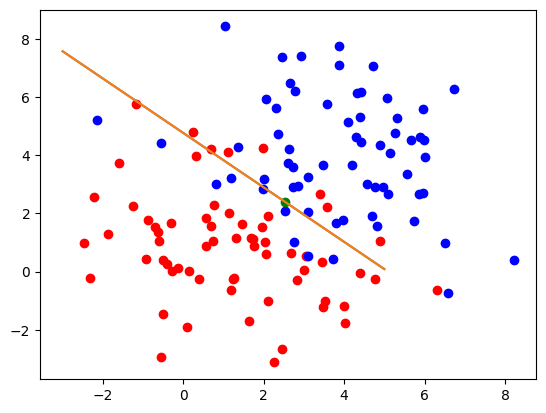

In [28]:
x = np.linspace(-3, 5, 100)
y = linear_function(x)
plt.plot(group_adam[:, 0], group_adam[:, 1], 'ro')
plt.plot(group_eve[:, 0], group_eve[:, 1], 'bo')

plt.plot(midpoint[0], midpoint[1], 'go')
plt.plot(x, y)
plt.plot(x, linear_boundary(x))
plt.show()

# The home made linear discriminant classifier is a-ok compared to the one used in sckitlearn which is cool